In [1]:
%config IPCompleter.greedy = True

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading train data

In [3]:
flight_train = pd.read_excel('Data_Train.xlsx')
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Loading train data

In [4]:
flight_test = pd.read_excel('Test_set.xlsx')
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Checking for null values

In [5]:
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Dropping rows with null values

In [6]:
flight_train = flight_train.dropna()

In [7]:
flight_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
flight_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## Creating day and month columns from Date_of_Journey column

In [9]:
flight_train['Day_of_journey'] = pd.to_datetime(flight_train['Date_of_Journey']).dt.day
flight_train['Month_of_journey'] = pd.to_datetime(flight_train['Date_of_Journey']).dt.month
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [10]:
flight_test['Day_of_journey'] = pd.to_datetime(flight_test['Date_of_Journey']).dt.day
flight_test['Month_of_journey'] = pd.to_datetime(flight_test['Date_of_Journey']).dt.month
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


## Dropping Date_of_Journey column

In [11]:
flight_train = flight_train.drop('Date_of_Journey', axis=1)
flight_test = flight_test.drop('Date_of_Journey', axis=1)

In [12]:
flight_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [13]:
flight_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


## Creating departure hour and departure minute columns from Dep_Time column

In [14]:
flight_train['Dep_hour'] = pd.to_datetime(flight_train['Dep_Time']).dt.hour
flight_train['Dep_minute'] = pd.to_datetime(flight_train['Dep_Time']).dt.minute
flight_train = flight_train.drop('Dep_Time', axis=1)

In [15]:
flight_test['Dep_hour'] = pd.to_datetime(flight_test['Dep_Time']).dt.hour
flight_test['Dep_minute'] = pd.to_datetime(flight_test['Dep_Time']).dt.minute
flight_test = flight_test.drop('Dep_Time', axis=1)

In [16]:
flight_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [17]:
flight_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,5,12,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


## Creating arrival hour and arrival minute columns from Arrival_Time column

In [18]:
flight_train['Arr_hour'] = pd.to_datetime(flight_train['Arrival_Time']).dt.hour
flight_train['Arr_minute'] = pd.to_datetime(flight_train['Arrival_Time']).dt.minute
flight_train = flight_train.drop('Arrival_Time', axis=1)

In [19]:
flight_test['Arr_hour'] = pd.to_datetime(flight_test['Arrival_Time']).dt.hour
flight_test['Arr_minute'] = pd.to_datetime(flight_test['Arrival_Time']).dt.minute
flight_test = flight_test.drop('Arrival_Time', axis=1)

In [20]:
flight_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


## Creating duration in minutes column

In [1]:
# Duration is mentioned in the format "2h 50m". We are converting this to minutes so that our model can understand.

In [21]:
duration_mins = []
duration = list(flight_train.Duration)
for i in range(len(duration)):
    a = duration[i].split()
    if len(a) !=2:
        if a[0][-1] == 'h':
            b = int(a[0][0:-1])*60
            duration_mins.append(b)
        elif a[0][-1] == 'm':
            b= int(a[0][0:-1])
            duration_mins.append(b)
    else:
        b = int(a[0][0:-1]) * 60 + int(a[1][0:-1])
        duration_mins.append(b)
duration_mins

[170,
 445,
 1140,
 325,
 285,
 145,
 930,
 1265,
 1530,
 470,
 795,
 155,
 135,
 730,
 155,
 1595,
 270,
 1355,
 1380,
 1235,
 310,
 920,
 170,
 175,
 800,
 910,
 345,
 355,
 170,
 135,
 135,
 805,
 170,
 1320,
 330,
 625,
 315,
 150,
 375,
 715,
 665,
 510,
 1325,
 165,
 720,
 170,
 170,
 135,
 965,
 1195,
 195,
 1520,
 170,
 180,
 170,
 975,
 905,
 135,
 390,
 1505,
 745,
 1640,
 615,
 630,
 135,
 625,
 170,
 90,
 800,
 135,
 85,
 1590,
 440,
 810,
 300,
 165,
 170,
 90,
 1145,
 135,
 890,
 160,
 1330,
 575,
 600,
 1280,
 325,
 1125,
 740,
 1080,
 555,
 665,
 1050,
 800,
 155,
 145,
 160,
 180,
 85,
 995,
 740,
 735,
 450,
 1440,
 165,
 535,
 430,
 870,
 1820,
 1195,
 900,
 175,
 765,
 610,
 355,
 925,
 965,
 610,
 160,
 715,
 160,
 85,
 845,
 1215,
 145,
 1390,
 1090,
 960,
 170,
 140,
 480,
 1015,
 190,
 165,
 840,
 1430,
 1300,
 1275,
 165,
 650,
 480,
 495,
 325,
 515,
 710,
 1655,
 505,
 1255,
 290,
 490,
 140,
 1465,
 170,
 740,
 735,
 1415,
 995,
 170,
 1545,
 1570,
 1730,
 1

In [22]:
len(duration_mins)

10682

In [23]:
len(flight_train.Duration)

10682

In [24]:
flight_train = flight_train.drop('Duration', axis=1)
flight_train['Duration'] = duration_mins
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,285


In [25]:
duration_mins_test = []
duration_test = list(flight_test.Duration)
for i in range(len(duration_test)):
    a = duration_test[i].split()
    if len(a) !=2:
        if a[0][-1] == 'h':
            b = int(a[0][0:-1])*60
            duration_mins_test.append(b)
        elif a[0][-1] == 'm':
            b= int(a[0][0:-1])
            duration_mins_test.append(b)
    else:
        b = int(a[0][0:-1]) * 60 + int(a[1][0:-1])
        duration_mins_test.append(b)
duration_mins_test

[655,
 240,
 1425,
 780,
 170,
 1100,
 905,
 315,
 165,
 365,
 1735,
 560,
 615,
 280,
 1040,
 650,
 555,
 735,
 550,
 560,
 890,
 845,
 695,
 810,
 170,
 745,
 150,
 1530,
 1165,
 420,
 150,
 700,
 425,
 180,
 85,
 160,
 85,
 365,
 1025,
 640,
 150,
 750,
 90,
 1420,
 315,
 140,
 1415,
 90,
 1660,
 810,
 1700,
 345,
 1585,
 340,
 135,
 175,
 345,
 450,
 320,
 1550,
 795,
 1580,
 345,
 340,
 160,
 170,
 325,
 525,
 180,
 440,
 90,
 1270,
 960,
 470,
 90,
 180,
 170,
 1165,
 175,
 845,
 170,
 965,
 355,
 150,
 615,
 830,
 135,
 715,
 150,
 800,
 1090,
 1690,
 300,
 1395,
 75,
 80,
 805,
 375,
 80,
 610,
 275,
 660,
 470,
 740,
 150,
 910,
 90,
 1140,
 825,
 740,
 590,
 845,
 155,
 280,
 435,
 1380,
 625,
 305,
 1365,
 520,
 1660,
 690,
 155,
 165,
 315,
 940,
 150,
 155,
 560,
 170,
 520,
 320,
 345,
 150,
 165,
 475,
 1165,
 170,
 165,
 770,
 165,
 1525,
 620,
 510,
 180,
 765,
 180,
 150,
 730,
 1350,
 475,
 465,
 420,
 175,
 150,
 175,
 160,
 170,
 1315,
 90,
 180,
 390,
 180,
 155,


In [26]:
len(duration_mins_test)

2671

In [27]:
len(flight_test.Duration)

2671

In [28]:
flight_test = flight_test.drop('Duration', axis=1)

In [29]:
flight_test['Duration'] = duration_mins_test
flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,170


## Creating the columns related to stops

In [30]:
flight_train['Route_1'] = flight_train['Route'].str.split("→ ").str[0]
flight_train['Route_2'] = flight_train['Route'].str.split("→ ").str[1]
flight_train['Route_3'] = flight_train['Route'].str.split("→ ").str[2]
flight_train['Route_4'] = flight_train['Route'].str.split("→ ").str[3]
flight_train['Route_5'] = flight_train['Route'].str.split("→ ").str[4]
flight_train['Route_6'] = flight_train['Route'].str.split("→ ").str[5]
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,445,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1140,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,325,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,285,BLR,NAG,DEL,NaN,NaN,NaN


In [31]:
flight_test['Route_1'] = flight_test['Route'].str.split("→ ").str[0]
flight_test['Route_2'] = flight_test['Route'].str.split("→ ").str[1]
flight_test['Route_3'] = flight_test['Route'].str.split("→ ").str[2]
flight_test['Route_4'] = flight_test['Route'].str.split("→ ").str[3]
flight_test['Route_5'] = flight_test['Route'].str.split("→ ").str[4]
flight_test['Route_6'] = flight_test['Route'].str.split("→ ").str[5]
flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,655,DEL,BOM,COK,NaN,NaN,NaN
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,240,CCU,MAA,BLR,NaN,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,1425,DEL,BOM,COK,NaN,NaN,NaN
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,780,DEL,BOM,COK,NaN,NaN,NaN
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,170,BLR,DEL,NaN,NaN,NaN,NaN


In [32]:
flight_train = flight_train.drop('Route', axis=1)
flight_test = flight_test.drop('Route', axis=1)

## Treating NaN as a category for the stops by replacing NaN with "None"

In [33]:
flight_train['Route_3'].fillna('None', inplace=True)
flight_train['Route_4'].fillna('None', inplace=True)
flight_train['Route_5'].fillna('None', inplace=True)
flight_train['Route_6'].fillna('None', inplace=True)
flight_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,170,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,5,50,13,15,445,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,9,25,4,25,1140,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,18,5,23,30,325,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,16,50,21,35,285,BLR,NAG,DEL,None,None,None


In [34]:
flight_test['Route_3'].fillna('None', inplace=True)
flight_test['Route_4'].fillna('None', inplace=True)
flight_test['Route_5'].fillna('None', inplace=True)
flight_test['Route_6'].fillna('None', inplace=True)
flight_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,17,30,4,25,655,DEL,BOM,COK,None,None,None
1,IndiGo,Kolkata,Banglore,1 stop,No info,5,12,6,20,10,20,240,CCU,MAA,BLR,None,None,None
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,19,15,19,0,1425,DEL,BOM,COK,None,None,None
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,5,8,0,21,0,780,DEL,BOM,COK,None,None,None
4,Air Asia,Banglore,Delhi,non-stop,No info,24,6,23,55,2,45,170,BLR,DEL,None,None,None,None


In [35]:
train = flight_train.copy()
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,170,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,5,50,13,15,445,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,9,25,4,25,1140,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,18,5,23,30,325,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,16,50,21,35,285,BLR,NAG,DEL,None,None,None


In [36]:
X_test = flight_test.copy()
X_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,17,30,4,25,655,DEL,BOM,COK,None,None,None
1,IndiGo,Kolkata,Banglore,1 stop,No info,5,12,6,20,10,20,240,CCU,MAA,BLR,None,None,None
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,19,15,19,0,1425,DEL,BOM,COK,None,None,None
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,5,8,0,21,0,780,DEL,BOM,COK,None,None,None
4,Air Asia,Banglore,Delhi,non-stop,No info,24,6,23,55,2,45,170,BLR,DEL,None,None,None,None


In [37]:
y_train = train['Price']
X_train = train.drop('Price', axis=1)
X_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,non-stop,No info,24,3,22,20,1,10,170,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,5,1,5,50,13,15,445,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,6,9,9,25,4,25,1140,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,5,12,18,5,23,30,325,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,3,1,16,50,21,35,285,BLR,NAG,DEL,None,None,None


In [38]:
y_train.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

## Label encoding the categorical columns

In [2]:
# We are label encoding these as the price depends on the source, destination, stops e.t.c Longer distance higher is the price.
#so, if we do label encoding, model will understand the relation and it will take the values in order

In [39]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()

In [40]:
X_train['Airline'] = le1.fit_transform(X_train['Airline'])
X_train['Source'] = le1.fit_transform(X_train['Source'])
X_train['Destination'] = le1.fit_transform(X_train['Destination'])
X_train['Total_Stops'] = le1.fit_transform(X_train['Total_Stops'])
X_train['Additional_Info'] = le1.fit_transform(X_train['Additional_Info'])
X_train['Route_1'] = le1.fit_transform(X_train['Route_1'])
X_train['Route_2'] = le1.fit_transform(X_train['Route_2'])
X_train['Route_3'] = le1.fit_transform(X_train['Route_3'])
X_train['Route_4'] = le1.fit_transform(X_train['Route_4'])
X_train['Route_5'] = le1.fit_transform(X_train['Route_5'])
X_train['Route_6'] = le1.fit_transform(X_train['Route_6'])
X_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,3,0,5,4,8,24,3,22,20,1,10,170,0,13,24,12,4,1
1,1,3,0,1,8,5,1,5,50,13,15,445,2,25,1,3,4,1
2,4,2,1,1,8,6,9,9,25,4,25,1140,3,32,4,5,4,1
3,3,3,0,0,8,5,12,18,5,23,30,325,2,34,3,12,4,1
4,3,0,5,0,8,3,1,16,50,21,35,285,0,34,8,12,4,1


In [41]:
X_test['Airline'] = le2.fit_transform(X_test['Airline'])
X_test['Source'] = le2.fit_transform(X_test['Source'])
X_test['Destination'] = le2.fit_transform(X_test['Destination'])
X_test['Total_Stops'] = le2.fit_transform(X_test['Total_Stops'])
X_test['Additional_Info'] = le2.fit_transform(X_test['Additional_Info'])
X_test['Route_1'] = le2.fit_transform(X_test['Route_1'])
X_test['Route_2'] = le2.fit_transform(X_test['Route_2'])
X_test['Route_3'] = le2.fit_transform(X_test['Route_3'])
X_test['Route_4'] = le2.fit_transform(X_test['Route_4'])
X_test['Route_5'] = le2.fit_transform(X_test['Route_5'])
X_test['Route_6'] = le2.fit_transform(X_test['Route_6'])
X_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,4,2,1,0,5,6,6,17,30,4,25,655,3,7,5,8,3,1
1,3,3,0,0,5,5,12,6,20,10,20,240,2,29,3,8,3,1
2,4,2,1,0,3,21,5,19,15,19,0,1425,3,7,5,8,3,1
3,6,2,1,0,5,21,5,8,0,21,0,780,3,7,5,8,3,1
4,0,0,2,4,5,24,6,23,55,2,45,170,0,13,21,8,3,1


## Checking if there are any features with zero variance

In [42]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [43]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

## Checking if there is any correlation between features

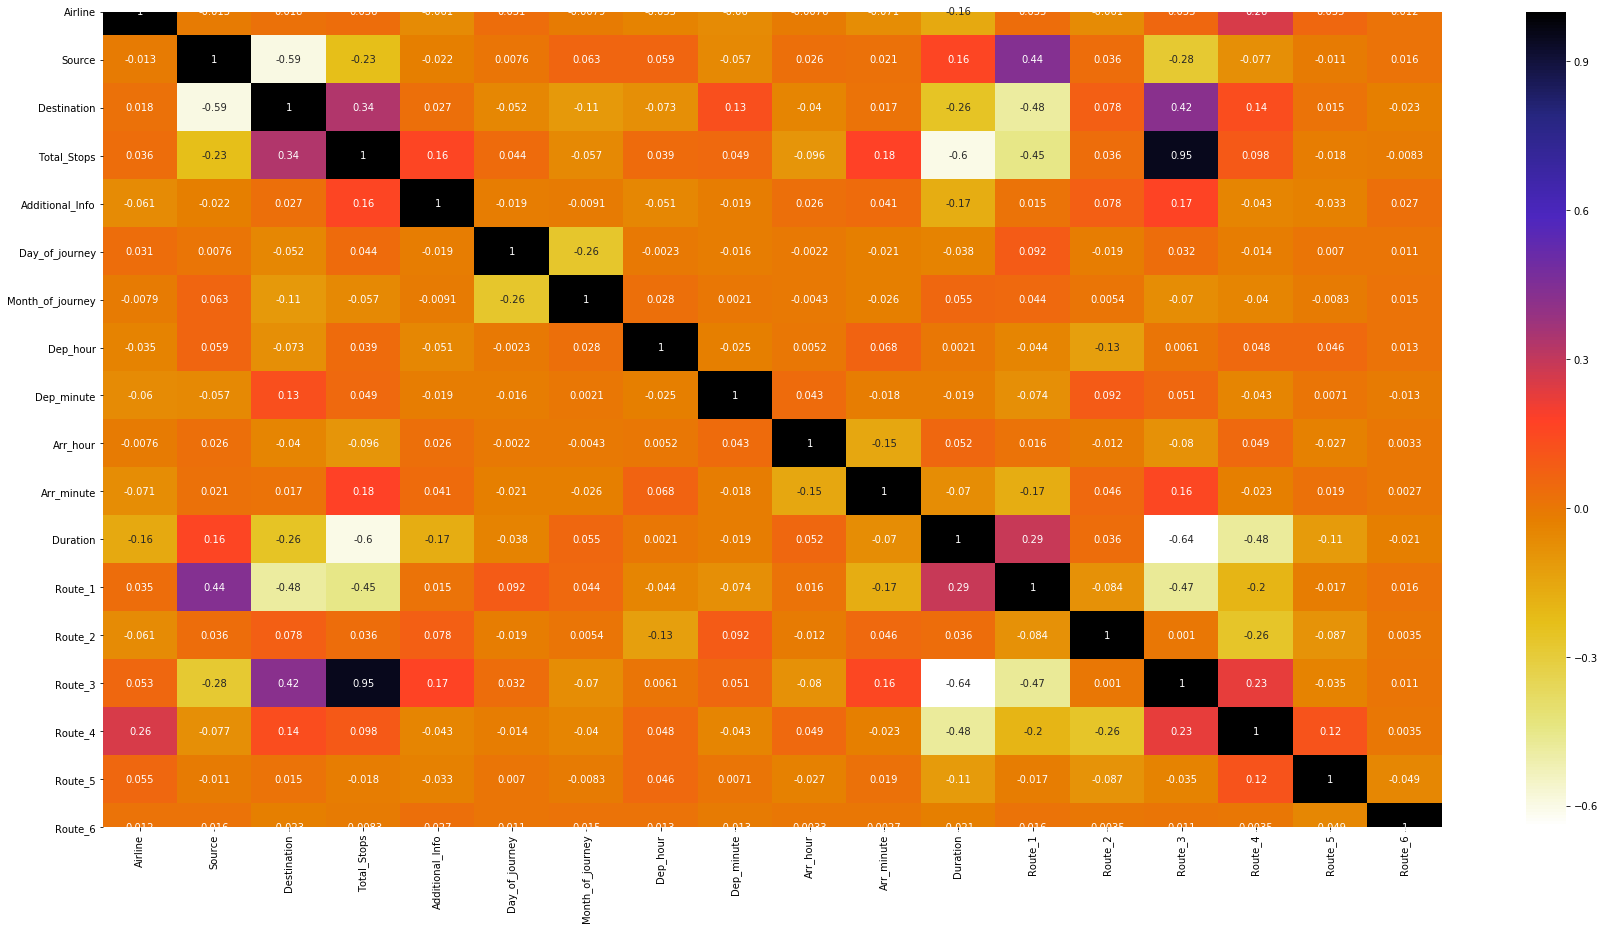

In [47]:
plt.figure(figsize=(30,15))
sns.heatmap(X_train.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Feature selection using Lasso

In [3]:
# We could see that all the features are important

In [49]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(Lasso(alpha=0.005, random_state=1))
model.fit(X_train, y_train)
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [50]:
selected_features=X_train.columns[(model.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Day_of_journey', 'Month_of_journey', 'Dep_hour', 'Dep_minute',
       'Arr_hour', 'Arr_minute', 'Duration', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5', 'Route_6'],
      dtype='object')

## Searching for best hyperparameters using Random search

In [51]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [52]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [54]:
# Random search of parameters,
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [55]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   4.0s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  13.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  14.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  13.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  13.8s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  13.5s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   7.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.2s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=  11.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=  11.3s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.8s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   8.9s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   9.0s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   8.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   5.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   5.0s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   4.9s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 27.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


## Predicting the prices

In [56]:
y_pred=rf_random.predict(X_test)
y_pred

array([11240.18099829,  6896.24842866, 14174.60010327, ...,
       18264.19547583, 14068.77101225, 11172.60841175])